# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_5 import *
from app_1 import *
from app_3 import *



In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP5 and creating Train, Validation and Test DataLoaders

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP5.APP5, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


len train:  1196
len val:  299
len test:  75


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 174MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app5.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9535524568031464,--- Validation loss: 0.820548963187929
Train Accuracy: 50.92%,--- Val Accuracy: 56.19%
--------------------------


Epoch [2/100] - Train loss: 0.6886383616007291,--- Validation loss: 0.612974976018121
Train Accuracy: 68.31%,--- Val Accuracy: 73.91%
--------------------------


Epoch [3/100] - Train loss: 0.6158932804263954,--- Validation loss: 0.5476330193787514
Train Accuracy: 71.82%,--- Val Accuracy: 75.92%
--------------------------


Epoch [4/100] - Train loss: 0.4621706178355775,--- Validation loss: 0.5984027886071731
Train Accuracy: 80.69%,--- Val Accuracy: 75.25%
--------------------------


Epoch [5/100] - Train loss: 0.3885555096394242,--- Validation loss: 0.2934882707619747
Train Accuracy: 83.53%,--- Val Accuracy: 86.62%
--------------------------


Epoch [6/100] - Train loss: 0.2957165157515867,--- Validation loss: 0.3710511218145938
Train Accuracy: 87.54%,--- Val Accuracy: 83.61%
--------------------------


Epoch [7/100] - Tr

# Plotting Result

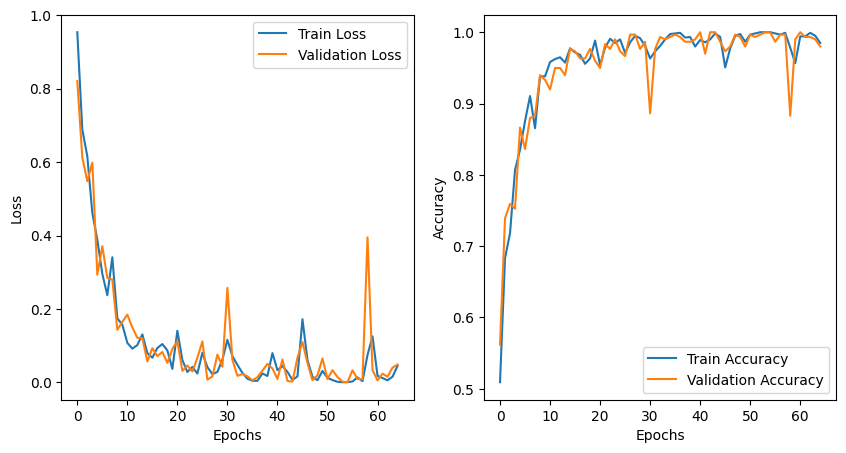

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      0.96      0.98        27
           2       0.90      1.00      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 168MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app5.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9048607403219344,--- Validation loss: 0.807427425647659
Train Accuracy: 60.54%,--- Val Accuracy: 68.90%
--------------------------


Epoch [2/100] - Train loss: 0.40256434061056795,--- Validation loss: 0.14643909179147668
Train Accuracy: 87.54%,--- Val Accuracy: 96.32%
--------------------------


Epoch [3/100] - Train loss: 0.17588069735960818,--- Validation loss: 0.06911436839022964
Train Accuracy: 93.81%,--- Val Accuracy: 98.33%
--------------------------


Epoch [4/100] - Train loss: 0.09650875827341175,--- Validation loss: 0.03784707081457444
Train Accuracy: 96.82%,--- Val Accuracy: 98.66%
--------------------------


Epoch [5/100] - Train loss: 0.08729440103406491,--- Validation loss: 0.022018066706310298
Train Accuracy: 97.07%,--- Val Accuracy: 99.33%
--------------------------


Epoch [6/100] - Train loss: 0.08379899167197205,--- Validation loss: 0.0207300437520878
Train Accuracy: 97.41%,--- Val Accuracy: 99.33%
--------------------------


Epoch [

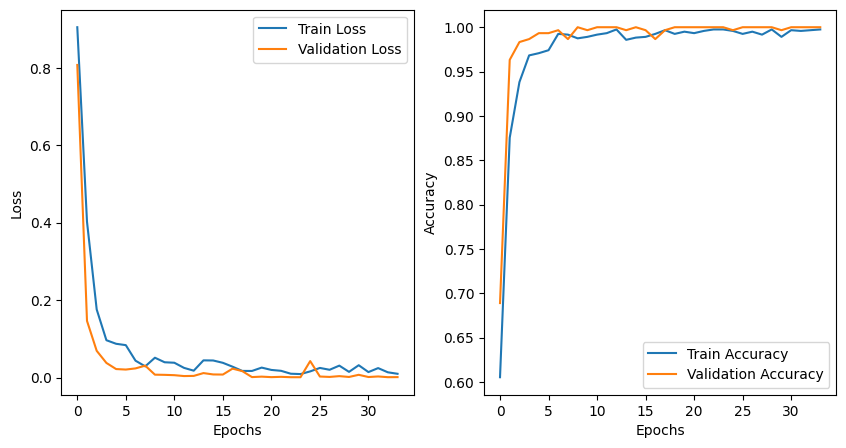

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.89      0.94        27
           2       0.95      1.00      0.97        19

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Accuracy of the network on the test images: 96.00 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 143MB/s]


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app5.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.6456347643132991,--- Validation loss: 0.49383694192637567
Train Accuracy: 72.49%,--- Val Accuracy: 79.60%
--------------------------


Epoch [2/100] - Train loss: 0.2002138325003876,--- Validation loss: 0.12249039559559678
Train Accuracy: 93.98%,--- Val Accuracy: 95.99%
--------------------------


Epoch [3/100] - Train loss: 0.1013197727925004,--- Validation loss: 0.059777842828362286
Train Accuracy: 97.58%,--- Val Accuracy: 99.00%
--------------------------


Epoch [4/100] - Train loss: 0.0837156124986135,--- Validation loss: 0.02429865594691656
Train Accuracy: 97.32%,--- Val Accuracy: 100.00%
--------------------------


Epoch [5/100] - Train loss: 0.057600285745783394,--- Validation loss: 0.01599326394233591
Train Accuracy: 98.33%,--- Val Accuracy: 99.67%
--------------------------


Epoch [6/100] - Train loss: 0.03958014314713885,--- Validation loss: 0.011267269527022556
Train Accuracy: 99.25%,--- Val Accuracy: 100.00%
--------------------------


Epo

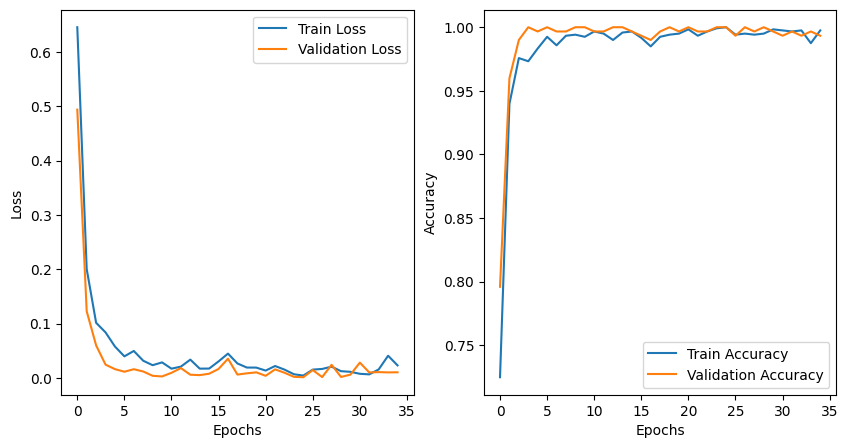

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %
